## Assignment 3

This assignment is very similar to Assignment 2, further pushing you to practice on reading data from a data source, storing the data in a database, and then fetching the data from a database for analysis.

Specifically, what you need to do:

Identify a web site that you will scrape, using XPath and regular expressions. Ideally (but not necessarily) the website should not have an API that returns the data that you want.  
Create a database and the corresponding set of tables for storing the data.  
Write Python code that fetches the data from the website, and parses the returned HTML (using XPath and/or regexes) to identify the data that you need.   
Write Python code that stores the fetched data into a database.  
Write code that queries the database, fetches the data into a Pandas Dataframe, and generate some visualization of the results.  

Note: Some websites employ different techniques to make scraping difficult. If you face problems, you should first check that the HTML that you fetch from Python actually contains the data that you need (do a string search in the response.text to check)

Your deliverable will be:

An iPython notebook with the code, and with some text explaining the data source and your objective (use the "File" => "Download As" => "Notebook (.ipynb)". Ensure that you upload the ipynb file.

#### Preparation

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])
plt.rcParams['figure.figsize'] = (10, 5)

In [3]:
from sqlalchemy import create_engine

conn_string = 'mysql://{user}:{password}@{host}/'.format(
    host = '127.0.0.1', 
    user = 'root',
    password = 'dwdstudent2015')

engine = create_engine(conn_string)
con = engine.connect()

In [4]:
from datetime import datetime
import re
import requests 
from lxml import html 

### Scrape the webwite

Barnes & Noble Top 100: Book Bestsellers

In [5]:
# Page 1: First 20
url = "https://www.barnesandnoble.com/b/books/_/N-1fZ29Z8q8?Nrpp=20&page=1"
firstpage = requests.get(url)
first = html.fromstring(firstpage.text)
first

<Element html at 0x7f0039de69a8>

In [6]:
books = first.xpath("//div[@class ='col-lg-8 product-info-listView']")
books

[<Element div at 0x7f00399774f8>,
 <Element div at 0x7f0039977548>,
 <Element div at 0x7f0039977598>,
 <Element div at 0x7f00399775e8>,
 <Element div at 0x7f0039977638>,
 <Element div at 0x7f0039977688>,
 <Element div at 0x7f00399776d8>,
 <Element div at 0x7f0039977728>,
 <Element div at 0x7f0039977778>,
 <Element div at 0x7f00399777c8>,
 <Element div at 0x7f0039977818>,
 <Element div at 0x7f0039977868>,
 <Element div at 0x7f00399778b8>,
 <Element div at 0x7f0039977908>,
 <Element div at 0x7f0039977958>,
 <Element div at 0x7f00399779a8>,
 <Element div at 0x7f00399779f8>,
 <Element div at 0x7f0039977a48>,
 <Element div at 0x7f0039977a98>,
 <Element div at 0x7f0039977ae8>]

In [7]:
for book in books:
    # Title, publish date, link
    info = book.xpath("./div[@class ='product-shelf-title']/h3[@class ='product-info-title']")[0]
    title = str(info.find("./a").text_content())
    publish_date = info.find("./span").text_content().replace("(","").replace(")","").replace(" ","") 
    publish_date = datetime.strptime(publish_date, "%m/%d/%Y").date()
    link = "https://www.barnesandnoble.com" + info.find("./a").get("href")
    
    print(title)
    print(publish_date)
    print(link)
    
    # Authors and contributors
    people = book.xpath("./div[@class ='product-shelf-author contributors']/a")
    for person in people:
        author = str(person.text_content())
        # Remove the space at the beginning of the names of authors/contributors
        if author.startswith(" "):
            author = author[1:]
        print(author)
    
    # Rating and number of reviews
    rating_in_string = book.xpath("./div[@class = 'product-shelf-ratings']")[0].get("aria-label")
    # Get the rating as a float, not something like "Rating 1.2 out of 5.0"
    rating = float(re.findall("\d\.\d(?= out)", rating_in_string)[0])
    reviews_in_string = book.xpath("./div[@class = 'product-shelf-ratings']//a")[0].text_content()
    # Get the number of reviews as an integer, not something like "18 Reviews" or "1 Review"
    review = int(re.findall("\d+(?= Review)", reviews_in_string)[0])
    print(review)
    print(rating)
   
    # Formats, current and previous prices, discounts
    pricing = book.xpath("./div[@class = 'product-shelf-pricing mt-s mb-s']")[0]
    formats = str(pricing.find(".//a[@class = ' format']").text_content())
    current = float(pricing.find(".//span[@class = 'current']/a").text_content()[1:]) # Remove the $ sign
    previous = float(pricing.find(".//span[@class = 'previous']").text_content()[1:]) 
    discount_in_string = pricing.find(".//span[@class = 'discount']").text_content()
    # Get the discount as an integer, not something like "Save 31%"
    discount = int(re.findall("\d+",discount_in_string)[0]) 
    print(formats)
    print(current)
    print(previous)
    print(discount)
    
    
    
    print("===============")

Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo
2018-03-18
https://www.barnesandnoble.com/w/last-week-tonight-with-john-oliver-presents-a-day-in-the-life-of-marlon-bundo-marlon-bundo/1128233387;jsessionid=799E93B80E3BC4CD309E7BA65E2EC46D.prodny_store01-atgap10?ean=9781452173801
Marlon Bundo
EG Keller
18
5.0
Hardcover
13.19
18.99
31
The Outsider
2018-05-22
https://www.barnesandnoble.com/w/the-outsider-stephen-king/1127208646;jsessionid=799E93B80E3BC4CD309E7BA65E2EC46D.prodny_store01-atgap10?ean=9781501180989
Stephen King
0
0.0
Hardcover
20.99
30.0
30
Ready Player One
2012-06-05
https://www.barnesandnoble.com/w/ready-player-one-ernest-cline/1100055635;jsessionid=799E93B80E3BC4CD309E7BA65E2EC46D.prodny_store01-atgap10?ean=9780307887443
Ernest Cline
923
4.6
Paperback
10.07
16.0
37
A Higher Loyalty: Truth, Lies, and Leadership
2018-04-17
https://www.barnesandnoble.com/w/a-higher-loyalty-james-comey/1127357941;jsessionid=799E93B80E3BC4CD309E7BA65E2EC46D.prodny_s

### Create a database and relevant tables

In [8]:
engine.execute("DROP DATABASE IF EXISTS bestsellers")

In [9]:
engine.execute("CREATE DATABASE IF NOT EXISTS bestsellers")

In [10]:
pd.read_sql("SHOW DATABASES", con = engine)

,Database
0,information_schema
1,air
2,bestsellers
3,citibike
4,college_scorecard
5,facebook
6,imdb
7,mysql
8,nyc_restaurant_inspections
9,performance_schema


In [48]:
engine.execute("USE bestsellers")

In [12]:
create_table_query = '''
CREATE TABLE IF NOT EXISTS books (
    title VARCHAR(300),
    publish_date DATETIME,
    link VARCHAR(500) PRIMARY KEY
)'''

engine.execute(create_table_query)

In [13]:
pd.read_sql("DESCRIBE books", con = engine)

,Field,Type,Null,Key,Default,Extra
0,title,varchar(300),YES,,None,
1,publish_date,datetime,YES,,None,
2,link,varchar(500),NO,PRI,None,


In [14]:
create_table_query = '''
CREATE TABLE IF NOT EXISTS authors (
    name VARCHAR(100) PRIMARY KEY
)'''

engine.execute(create_table_query)

In [15]:
pd.read_sql("DESCRIBE authors", con = engine)

,Field,Type,Null,Key,Default,Extra
0,name,varchar(100),NO,PRI,None,


In [16]:
create_table_query = '''
CREATE TABLE IF NOT EXISTS books_authors (
    name VARCHAR(100),
    link VARCHAR(500),
    PRIMARY KEY(name, link),
    FOREIGN KEY(link) REFERENCES books(link),
    FOREIGN KEY(name) REFERENCES authors(name)
)'''

engine.execute(create_table_query)

In [17]:
pd.read_sql("DESCRIBE books_authors", con = engine)

,Field,Type,Null,Key,Default,Extra
0,name,varchar(100),NO,PRI,None,
1,link,varchar(500),NO,PRI,None,


In [18]:
create_table_query = '''
CREATE TABLE IF NOT EXISTS reviews (
    link VARCHAR(500),
    num_review INT,
    rating DECIMAL,
    FOREIGN KEY(link) REFERENCES books(link),
    PRIMARY KEY(link) 
)'''

engine.execute(create_table_query)

In [19]:
pd.read_sql("DESCRIBE reviews", con = engine)

,Field,Type,Null,Key,Default,Extra
0,link,varchar(500),NO,PRI,None,
1,num_review,int(11),YES,,None,
2,rating,"decimal(10,0)",YES,,None,


In [20]:
create_table_query = '''
CREATE TABLE IF NOT EXISTS prices (
    link VARCHAR(500),
    format VARCHAR(100),
    current DECIMAL,
    previous DECIMAL,
    discount INT,
    FOREIGN KEY(link) REFERENCES books(link),
    PRIMARY KEY(link) 
)'''

engine.execute(create_table_query)

In [21]:
pd.read_sql("DESCRIBE prices", con = engine)

,Field,Type,Null,Key,Default,Extra
0,link,varchar(500),NO,PRI,None,
1,format,varchar(100),YES,,None,
2,current,"decimal(10,0)",YES,,None,
3,previous,"decimal(10,0)",YES,,None,
4,discount,int(11),YES,,None,


### Insert Data

In [22]:
insert_query_template = '''INSERT IGNORE INTO books (
    title,
    publish_date,
    link)
    VALUES (%s, %s, %s)'''

for i in range(1,6):
    page = requests.get("https://www.barnesandnoble.com/b/books/_/N-1fZ29Z8q8?Nrpp=20&page={}".format(i))
    page = html.fromstring(page.text)
    
    books = page.xpath("//div[@class ='col-lg-8 product-info-listView']")
    for book in books:
        
    # Title, publish date, link
        info = book.xpath("./div[@class ='product-shelf-title']/h3[@class ='product-info-title']")[0]
        title = str(info.find("./a").text_content())
        publish_date = info.find("./span").text_content().replace("(","").replace(")","").replace(" ","") 
        publish_date = datetime.strptime(publish_date, "%m/%d/%Y").date()
        link = "https://www.barnesandnoble.com" + info.find("./a").get("href")
        
        insert_query_parameters = (
        title,
        publish_date,
        link)
        
        engine.execute(insert_query_template, insert_query_parameters)

In [23]:
pd.read_sql("SELECT * FROM books", con = engine)

,title,publish_date,link
0,12 Rules for Life: An Antidote to Chaos,2018-01-23,https://www.barnesandnoble.com/w/12-rules-for-...
1,A Court of Frost and Starlight (A Court of Tho...,2018-05-01,https://www.barnesandnoble.com/w/a-court-of-fr...
2,A Gentleman in Moscow,2016-09-06,https://www.barnesandnoble.com/w/a-gentleman-i...
3,"A Higher Loyalty: Truth, Lies, and Leadership",2018-04-17,https://www.barnesandnoble.com/w/a-higher-loya...
4,A Man Called Ove,2015-05-05,https://www.barnesandnoble.com/w/a-man-called-...
5,Accidental Heroes,2018-03-20,https://www.barnesandnoble.com/w/accidental-he...
6,The Alchemist (25th Anniversary Edition),2014-04-15,https://www.barnesandnoble.com/w/alchemist-pau...
7,Alternate Side,2018-03-20,https://www.barnesandnoble.com/w/alternate-sid...
8,"Am I There Yet?: The Loop-de-loop, Zigzagging ...",2018-03-27,https://www.barnesandnoble.com/w/am-i-there-ye...
9,An American Marriage (Oprah's Book Club),2018-02-06,https://www.barnesandnoble.com/w/an-american-m...


In [24]:
insert_query_template = '''INSERT IGNORE INTO authors (
    name)
    VALUES (%s)'''

for i in range(1,6):
    page = requests.get("https://www.barnesandnoble.com/b/books/_/N-1fZ29Z8q8?Nrpp=20&page={}".format(i))
    page = html.fromstring(page.text)
    
    books = page.xpath("//div[@class ='col-lg-8 product-info-listView']")
    for book in books:
        
    # Authors and contributors
        people = book.xpath("./div[@class ='product-shelf-author contributors']/a")
        for person in people:
            author = str(person.text_content())
            # Remove the space at the beginning of the names of authors/contributors
            if author.startswith(" "):
                author = author[1:]
        
            insert_query_parameters = (author)
        
            engine.execute(insert_query_template, insert_query_parameters)

/usr/local/lib/python3.5/dist-packages/sqlalchemy/engine/default.py:507: Warning: (1062, "Duplicate entry 'James Patterson' for key 'PRIMARY'")
  cursor.execute(statement, parameters)
/usr/local/lib/python3.5/dist-packages/sqlalchemy/engine/default.py:507: Warning: (1062, "Duplicate entry 'Rupi Kaur' for key 'PRIMARY'")
  cursor.execute(statement, parameters)
/usr/local/lib/python3.5/dist-packages/sqlalchemy/engine/default.py:507: Warning: (1062, "Duplicate entry 'r.h. Sin' for key 'PRIMARY'")
  cursor.execute(statement, parameters)
/usr/local/lib/python3.5/dist-packages/sqlalchemy/engine/default.py:507: Warning: (1062, "Duplicate entry 'J. K. Rowling' for key 'PRIMARY'")
  cursor.execute(statement, parameters)
/usr/local/lib/python3.5/dist-packages/sqlalchemy/engine/default.py:507: Warning: (1062, "Duplicate entry 'Madeleine L'Engle' for key 'PRIMARY'")
  cursor.execute(statement, parameters)
/usr/local/lib/python3.5/dist-packages/sqlalchemy/engine/default.py:507: Warning: (1062, "Dup

In [25]:
pd.read_sql("SELECT * FROM authors", con = engine)

,name
0,A. J. Finn
1,Alex Hirsch
2,Alexandra Christo
3,Amie Kaufman
4,Amor Towles
5,Amy Chua
6,Amy-Clare Barden
7,Andre Aciman
8,Angie Thomas
9,Anita Shreve


In [26]:
insert_query_template = '''INSERT IGNORE INTO books_authors (
    name,
    link)
    VALUES (%s, %s)'''

for i in range(1,6):
    page = requests.get("https://www.barnesandnoble.com/b/books/_/N-1fZ29Z8q8?Nrpp=20&page={}".format(i))
    page = html.fromstring(page.text)
    
    books = page.xpath("//div[@class ='col-lg-8 product-info-listView']")
    for book in books:
        
        people = book.xpath("./div[@class ='product-shelf-author contributors']/a")
        for person in people:
            link = "https://www.barnesandnoble.com" + book.xpath("./div[@class ='product-shelf-title']/h3[@class ='product-info-title']/a")[0].get("href")
            author = str(person.text_content())
            if author.startswith(" "):
                author = author[1:]
                
            insert_query_parameters = (author, link)
        
            engine.execute(insert_query_template, insert_query_parameters) 

In [27]:
# Sometimes the links don't work that well: "a foreign key constraint fails"
pd.read_sql("SELECT * FROM books_authors", con = engine)

,name,link
0,Jordan B. Peterson,https://www.barnesandnoble.com/w/12-rules-for-...
1,Sarah J. Maas,https://www.barnesandnoble.com/w/a-court-of-fr...
2,Amor Towles,https://www.barnesandnoble.com/w/a-gentleman-i...
3,James Comey,https://www.barnesandnoble.com/w/a-higher-loya...
4,Fredrik Backman,https://www.barnesandnoble.com/w/a-man-called-...
5,Danielle Steel,https://www.barnesandnoble.com/w/accidental-he...
6,Paulo Coelho,https://www.barnesandnoble.com/w/alchemist-pau...
7,Anna Quindlen,https://www.barnesandnoble.com/w/alternate-sid...
8,Mari Andrew,https://www.barnesandnoble.com/w/am-i-there-ye...
9,Tayari Jones,https://www.barnesandnoble.com/w/an-american-m...


In [28]:
insert_query_template = '''INSERT IGNORE INTO reviews (
    link,
    num_review,
    rating)
    VALUES (%s, %s, %s)'''

for i in range(1,6):
    page = requests.get("https://www.barnesandnoble.com/b/books/_/N-1fZ29Z8q8?Nrpp=20&page={}".format(i))
    page = html.fromstring(page.text)
    books = page.xpath("//div[@class ='col-lg-8 product-info-listView']")
    
    for book in books:
        info = book.xpath("./div[@class ='product-shelf-title']/h3[@class ='product-info-title']")[0]
        link = "https://www.barnesandnoble.com" + info.find("./a").get("href")
        # Rating and number of reviews
        rating_in_string = book.xpath("./div[@class = 'product-shelf-ratings']")[0].get("aria-label")
        # Get the rating as a float, not something like "Rating 1.2 out of 5.0"
        rating = float(re.findall("\d\.\d(?= out)", rating_in_string)[0])
        reviews_in_string = book.xpath("./div[@class = 'product-shelf-ratings']//a")[0].text_content()
        # Get the number of reviews as an integer, not something like "18 Reviews" or "1 Review"
        review = int(re.findall("\d+(?= Review)", reviews_in_string)[0])
        
        insert_query_parameters = (link, review, rating)
        
        engine.execute(insert_query_template, insert_query_parameters)

/usr/local/lib/python3.5/dist-packages/sqlalchemy/engine/default.py:507: Warning: (1265, "Data truncated for column 'rating' at row 1")
  cursor.execute(statement, parameters)


In [29]:
# Sometimes the links don't work that well: "a foreign key constraint fails"
pd.read_sql("SELECT * FROM reviews", con = engine)

,link,num_review,rating
0,https://www.barnesandnoble.com/w/12-rules-for-...,8,5.0
1,https://www.barnesandnoble.com/w/a-court-of-fr...,0,0.0
2,https://www.barnesandnoble.com/w/a-gentleman-i...,102,5.0
3,https://www.barnesandnoble.com/w/a-higher-loya...,0,0.0
4,https://www.barnesandnoble.com/w/a-man-called-...,240,5.0
5,https://www.barnesandnoble.com/w/accidental-he...,7,5.0
6,https://www.barnesandnoble.com/w/alchemist-pau...,1781,4.0
7,https://www.barnesandnoble.com/w/alternate-sid...,4,4.0
8,https://www.barnesandnoble.com/w/am-i-there-ye...,1,5.0
9,https://www.barnesandnoble.com/w/an-american-m...,33,5.0


In [59]:
insert_query_template = '''INSERT IGNORE INTO prices (
    link,
    format,
    current,
    previous,
    discount)
    VALUES (%s, %s, %s, %s, %s)'''

for i in range(1,6):
    page = requests.get("https://www.barnesandnoble.com/b/books/_/N-1fZ29Z8q8?Nrpp=20&page={}".format(i))
    page = html.fromstring(page.text)
    books = page.xpath("//div[@class ='col-lg-8 product-info-listView']")
    
    for book in books:
        info = book.xpath("./div[@class ='product-shelf-title']/h3[@class ='product-info-title']")[0]
        link = "https://www.barnesandnoble.com" + info.find("./a").get("href")
        
        # Formats, current and previous prices, discounts
        pricing = book.xpath("./div[@class = 'product-shelf-pricing mt-s mb-s']")[0]
        formats = str(pricing.find(".//a[@class = ' format']").text_content())
        current = float(pricing.find(".//span[@class = 'current']/a").text_content()[1:]) # Remove the $ sign
        previous = float(pricing.find(".//span[@class = 'previous']").text_content()[1:]) 
        discount_in_string = pricing.find(".//span[@class = 'discount']").text_content()
        # Get the discount as an integer, not something like "Save 31%"
        discount = int(re.findall("\d+",discount_in_string)[0]) 
        
        insert_query_parameters = (link, formats, current, previous, discount)
        
        engine.execute(insert_query_template, insert_query_parameters)

/usr/local/lib/python3.5/dist-packages/sqlalchemy/engine/default.py:507: Warning: (1265, "Data truncated for column 'current' at row 1")
  cursor.execute(statement, parameters)
/usr/local/lib/python3.5/dist-packages/sqlalchemy/engine/default.py:507: Warning: (1265, "Data truncated for column 'previous' at row 1")
  cursor.execute(statement, parameters)
/usr/local/lib/python3.5/dist-packages/sqlalchemy/engine/default.py:507: Warning: (1452, 'Cannot add or update a child row: a foreign key constraint fails (`bestsellers`.`prices`, CONSTRAINT `prices_ibfk_1` FOREIGN KEY (`link`) REFERENCES `books` (`link`))')
  cursor.execute(statement, parameters)


AttributeError: 'NoneType' object has no attribute 'text_content'

In [60]:
# Sometimes previous/current prices can't be extracted from text_content()
pd.read_sql("SELECT * FROM prices", con = engine)

,link,format,current,previous,discount
0,https://www.barnesandnoble.com/w/12-rules-for-...,Hardcover,16.0,26.0,40
1,https://www.barnesandnoble.com/w/a-court-of-fr...,Hardcover,14.0,18.0,24
2,https://www.barnesandnoble.com/w/a-higher-loya...,Hardcover,20.0,30.0,32
3,https://www.barnesandnoble.com/w/accidental-he...,Hardcover,17.0,29.0,40
4,https://www.barnesandnoble.com/w/alternate-sid...,Hardcover,18.0,28.0,37
5,https://www.barnesandnoble.com/w/an-american-m...,Hardcover,16.0,27.0,40
6,https://www.barnesandnoble.com/w/basketball-sh...,Paperback,14.0,20.0,31
7,https://www.barnesandnoble.com/w/before-we-wer...,Hardcover,16.0,26.0,37
8,https://www.barnesandnoble.com/w/brief-history...,Paperback,12.0,18.0,32
9,https://www.barnesandnoble.com/w/children-of-b...,Hardcover,12.0,19.0,37


### Some interesting findings

In [40]:
# Unsurprisingly, out of the current top 100,
# the majority of books was released or will be released in 2018
query1 = '''
SELECT year(publish_date), count(title)
FROM books
GROUP BY year(publish_date)
ORDER BY year(publish_date), count(title)
'''
q1 = pd.read_sql(query1, con = engine)
q1 = q1.set_index('year(publish_date)')
q1

,count(title)
year(publish_date),
1997,1
1998,2
2007,2
2008,1
2009,1
2012,2
2013,1
2014,2
2015,4


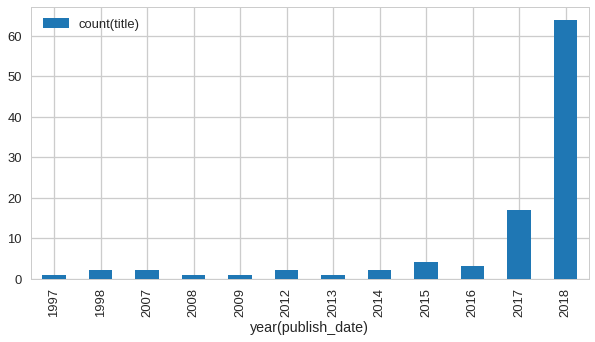

In [43]:
q1.plot(kind = 'bar')

In [51]:
# 11 not-released books are already in the best 100
query2 = '''
SELECT title, publish_date
FROM books
WHERE publish_date > (SELECT CURRENT_DATE())
ORDER BY publish_date
'''
q2 = pd.read_sql(query2, con = engine)
q2

,title,publish_date
0,She Felt Like Feeling Nothing,2018-04-10
1,Shoot First (Stone Barrington Series #45),2018-04-10
2,The Fates Divide (Signed Book) (Carve the Mark...,2018-04-10
3,The Thief (Signed Book) (Black Dagger Brotherh...,2018-04-10
4,"A Higher Loyalty: Truth, Lies, and Leadership",2018-04-17
5,A Court of Frost and Starlight (A Court of Tho...,2018-05-01
6,The Burning Maze (B&N Exclusive Edition) (The ...,2018-05-01
7,War Storm (B&N Exclusive Edition) (Red Queen S...,2018-05-15
8,The President Is Missing,2018-06-04
9,Gravity Falls: Lost Legends: 4 All-New Adventu...,2018-07-24


In [58]:
# Minimum discount 12% while maximum discount 40%
query3 = '''
SELECT B.title, P. discount
FROM books B INNER JOIN prices P
ON B.link = P.link
WHERE P. discount = (SELECT min(discount) FROM prices) OR P. discount = (SELECT max(discount) FROM prices)
ORDER BY P.discount 
'''
q3 = pd.read_sql(query3, con = engine)
q3

,title,discount
0,Norse Mythology,12
1,Red Alert: An NYPD Red Mystery,40
2,The Woman in the Window,40
3,The Subtle Art of Not Giving a F*ck: A Counter...,40
4,The Punishment She Deserves (Inspector Lynley ...,40
5,The Great Alone,40
6,The Escape Artist,40
7,The Disappeared (Joe Pickett Series #18),40
8,The Bishop's Pawn (Cotton Malone Series #13),40
9,Russian Roulette: The Inside Story of Putin's ...,40


In [62]:
query4 = '''
SELECT B.title, R.num_review
FROM reviews R INNER JOIN books B 
ON B.link = R.link
WHERE R.num_review > 100
ORDER BY num_review DESC
'''
q4 = pd.read_sql(query4, con = engine)
q4

,title,num_review
0,"Harry Potter Paperback Boxed Set, Books 1-7",3043
1,The Alchemist (25th Anniversary Edition),1781
2,A Wrinkle in Time (Time Quintet Series #1),1513
3,Ready Player One,923
4,The Nightingale,766
5,Fahrenheit 451,542
6,The Four Agreements: A Practical Guide to Pers...,280
7,A Man Called Ove,240
8,Before We Were Yours,181
9,A Brief History of Time: From the Big Bang to ...,163


In [82]:
# "Harry Potter and the Prisoner of Azkaban" "Harry Potter and the Sorcerer's Stone" are more popular than the others
query5 = '''
SELECT B.title, A.name
FROM books B INNER JOIN books_authors A
ON B.link = A.link
WHERE A.name = "J. K. Rowling"
'''
q5 = pd.read_sql(query5, con = engine)
q5

,title,name
0,Harry Potter and the Prisoner of Azkaban: The ...,J. K. Rowling
1,Harry Potter and the Sorcerer's Stone: The Ill...,J. K. Rowling
2,"Harry Potter Paperback Boxed Set, Books 1-7",J. K. Rowling
